In [1]:
import numpy as np
from sklearn import datasets, model_selection
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Loading dataset

In [2]:
def load_dataset():       
    f = open("01_homework_dataset.csv")
    f.readline()  # skip the header
    dataset = np.loadtxt(f, delimiter=",")
    #dataset = pd.read_csv('01_homework_dataset.csv')
    X, y = dataset[:,:3], dataset[:,3]    
    return X, y

All needed functions

In [3]:
def euclidean_distance(x1, x2):
    return np.linalg.norm(np.subtract(x1,x2))

In [33]:
def get_neighbors_labels(X, y, x_new, k):   
    euc_l = np.empty((0, 2), int)
    # getting an array [euclidean distance, label]
    for i in range(len(X)):
        euc_l = np.append(euc_l, [[euclidean_distance(X[i], x_new), y[i]]], axis=0)
    # sorting an array through the euclidean distance   
    euc_l = euc_l[euc_l[:, 0].argsort()]  
    return euc_l[0:k, :]

In [35]:
def get_response(neighbors, num_classes=3):    
    m_dict = {'max': [0, 0]}
    """ 
    generating a dictionary where 
    m_dict['max'] = [label, number of values]
    m_dict[label] = number of values
    """
    for i in neighbors[:,1]:        
        if i in m_dict:
            m_dict[i] += 1
            if m_dict[i] > m_dict['max'][1]:
                m_dict['max'][0] = i
                m_dict['max'][1] = m_dict[i]
        else:
            m_dict[i] = 1
            if m_dict['max'][1] == 0:
                m_dict['max'][0] = i
                m_dict['max'][1] = 1 
    # return of the label with maximum count
    return m_dict['max'][0]

In [73]:
def get_response_regression(neighbors, weight_flag):
    if not weight_flag:        
        return np.sum(neighbors[:,1])/len(neighbors[:,1])
    else:
        sum_n = 0
        z = 0
        for i in neighbors:
            z += 1/i[0]
            sum_n += i[1]/i[0]            
        return sum_n/z

We don't need test and train datasets here, so no need to split

In [74]:
X, y = load_dataset()

Answer for problem 4

In [75]:
def get_answer_4(X, y, x_new, k):
    # finding the closest neighbour
    return get_response(get_neighbors_labels(X, y, x_new, k))
k = 3
x1 = get_answer_4(X, y, [4.1, -0.1, 2.2], k)
x2 = get_answer_4(X, y, [6.1, 0.4, 1.3], k)
print('x1 = {0}'.format(x1))
print('x2 = {0}'.format(x2))

x1 = 0.0
x2 = 2.0


Answer for problem 5 (unweighted)

In [76]:
def get_answer_5(X, y, x_new, k): 
    return get_response_regression(get_neighbors_labels(X, y, x_new, k),0)
k = 3
x1= get_answer_5(X, y, [4.1, -0.1, 2.2], k)
x2= get_answer_5(X, y, [6.1, 0.4, 1.3], k)
print('x1 = {0}'.format(x1))
print('x2 = {0}'.format(x2))

x1 = 1.0
x2 = 1.3333333333333333


Answer for problem 5 (weighted)

In [77]:
def get_answer_5(X, y, x_new, k): 
    return get_response_regression(get_neighbors_labels(X, y, x_new, k),1)
k = 3
x1= get_answer_5(X, y, [4.1, -0.1, 2.2], k)
x2= get_answer_5(X, y, [6.1, 0.4, 1.3], k)
print('x1 = {0}'.format(x1))
print('x2 = {0}'.format(x2))

x1 = 0.5610164259744004
x2 = 1.3959245132894498


Analysis for problem 6

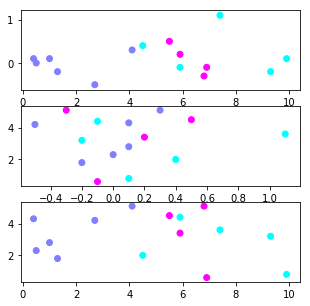

In [78]:
f, axes = plt.subplots(3,figsize=(5, 5))
axes[0].scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.cool)
axes[1].scatter(X[:,1],X[:,2], c=y, cmap=plt.cm.cool)
axes[2].scatter(X[:,0],X[:,2], c=y, cmap=plt.cm.cool)

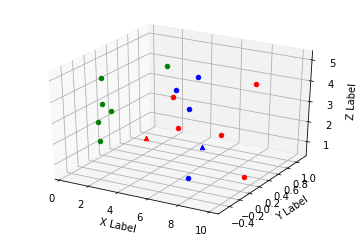

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(X)):
    xs = X[i][0]
    ys = X[i][1]
    zs = X[i][2]
    if y[i] == 0:
        c = 'r'
    elif y[i] == 1:
        c = 'g'
    else:
        c = 'b'
    ax.scatter(xs, ys, zs, c=c, marker='o')
ax.scatter(4.1, -0.1, 2.2, c='r',marker='^')
ax.scatter(6.1, 0.4, 1.3, c='b',marker='^')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()
